In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [0]:
import xlrd
import csv

data_train_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Train.xlsx")
data_test_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Test.xlsx")
data_train_csv_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Train.csv")
data_test_csv_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Test.csv")

def csv_from_excel(data_path , csv_path):
    wb = xlrd.open_workbook(data_path)
    sh = wb.sheet_by_name('Sheet1')
    your_csv_file = open(csv_path, 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel(data_train_path , data_train_csv_path)
csv_from_excel(data_test_path , data_test_csv_path)

In [726]:
data_train = pd.read_csv(data_train_csv_path)
data_test = pd.read_csv(data_test_csv_path)
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [727]:
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014.0,40929.0,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013.0,54493.0,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017.0,34000.0,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012.0,139000.0,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014.0,29000.0,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [728]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   float64
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), object(8)
memory usage: 564.4+ KB


In [729]:
data_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [730]:
data_train.shape , data_test.shape

((6019, 12), (1234, 11))

In [731]:
data_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [732]:
data_test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [733]:
data_train["Mileage"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
6014    False
6015    False
6016    False
6017    False
6018    False
Name: Mileage, Length: 6019, dtype: bool

In [734]:
df1 = data_train[data_train.isna().any(axis=1)]
df2 = data_test[data_test.isna().any(axis=1)]
df1.shape,df2.shape

((44, 12), (11, 11))

In [735]:
data_test_null_string = data_test[data_test['Power'].str.contains('null' , na = True)]
data_test_null_string.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1126,Toyota Etios Liva G,Kolkata,2012.0,37212.0,Petrol,Manual,First,18.3 kmpl,1197 CC,null bhp,5.0
572,Ford Fiesta 1.4 SXi TDCi,Pune,2009.0,134000.0,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0
658,Fiat Punto 1.4 Emotion,Jaipur,2010.0,65000.0,Petrol,Manual,Third,14.6 kmpl,NaN,NaN,NaN
143,Ford Fiesta 1.4 SXI Duratorq,Jaipur,2008.0,135000.0,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0
557,Hyundai Santro LS zipPlus,Kolkata,2002.0,80000.0,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012.0,58000.0,Petrol,Automatic,Second,15.0 kmpl,NaN,NaN,NaN
74,Hyundai Santro Xing XL,Bangalore,2007.0,47000.0,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009.0,72000.0,Petrol,Manual,Second,17.5 kmpl,NaN,NaN,NaN
704,Ford Fiesta 1.4 SXi TDCi,Kolkata,2009.0,39408.0,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0
367,Nissan Teana 230jM,Coimbatore,2009.0,67038.0,Petrol,Automatic,First,9.1 kmpl,2349 CC,null bhp,5.0


In [736]:
# # data_test[data_test['Power'].str.contains('null' , na = True)]
# data_test.loc[data_test['Power'].str.contains('null' , na = True) , :]  = np.NaN
# data_test.loc[data_test.isnull().any(axis=1), :] = np.nan
# data_test["Power"] = data_test["Power"].replace(to_replace = [] , np.NaN)


data_train["Power"] = data_train["Power"].replace(to_replace="[null]" , value = np.NaN , regex = True)
data_test["Power"] = data_test["Power"].replace(to_replace="[null]" , value = np.NaN , regex = True)
data_test.tail(100)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1134,Mercedes-Benz A Class Edition 1,Kochi,2016.0,27508.0,Diesel,Automatic,First,20.0 kmpl,2143 CC,107.3 bhp,5.0
1135,Hyundai Verna 1.6 SX VTVT (O) AT,Mumbai,2014.0,28000.0,Petrol,Automatic,First,17.1 kmpl,1591 CC,121.4 bhp,5.0
1136,Mercedes-Benz New C-Class C 220d Avantgarde Ed...,Mumbai,2014.0,45000.0,Diesel,Automatic,First,19.27 kmpl,2143 CC,167.62 bhp,5.0
1137,BMW 7 Series 740i Sedan,Kochi,2013.0,86107.0,Petrol,Automatic,First,8.45 kmpl,2979 CC,321 bhp,5.0
1138,Land Rover Range Rover 2.2L Pure,Hyderabad,2015.0,49000.0,Diesel,Automatic,Second,12.7 kmpl,2179 CC,187.7 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011.0,89411.0,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015.0,59000.0,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012.0,28000.0,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
1232,Volkswagen Polo GT TSI,Pune,2013.0,52262.0,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [737]:
data_test["Power"].value_counts()

74 bhp        45
98.6 bhp      35
73.9 bhp      27
82 bhp        23
86.8 bhp      22
              ..
73.8 bhp       1
179.5 bhp      1
91.72 bhp      1
254.79 bhp     1
73.74 bhp      1
Name: Power, Length: 248, dtype: int64

In [0]:
# data_test['Power'].str.contains('null' , na = True)

In [739]:
empty_cols_list_train = ["Mileage","Engine","Power","Seats"] 
empty_cols_list_test = ["Engine","Power","Seats"] 

my_Nan_filling_function(data_train , empty_cols_list_train)

def my_Nan_filling_function(dataset , empty_cols_list):
    for i in range(len(empty_cols_list)):
        # Replacing Nan with mean values
        # dataset[empty_cols_list[i]].fillna(dataset[empty_cols_list[i]].mean , inplace = True)
        # # Replacing Nan with mode values
        dataset[empty_cols_list[i]].fillna(dataset[empty_cols_list[i]].mode()[0] , inplace = True)

    print(dataset)


                                  Name    Location  ...  Seats  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...      5   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...      5  12.50
2                         Honda Jazz V     Chennai  ...      5   4.50
3                    Maruti Ertiga VDI     Chennai  ...      7   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...      5  17.74
...                                ...         ...  ...    ...    ...
6014                  Maruti Swift VDI       Delhi  ...      5   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...      5   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...      8   2.90
6017                Maruti Wagon R VXI     Kolkata  ...      5   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...      5   2.50

[6019 rows x 12 columns]


In [740]:
data_train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [741]:
my_Nan_filling_function(data_test , empty_cols_list_test)

                                                   Name  ... Seats
0                               Maruti Alto K10 LXI CNG  ...   4.0
1                         Maruti Alto 800 2016-2019 LXI  ...   5.0
2             Toyota Innova Crysta Touring Sport 2.4 MT  ...   7.0
3                                  Toyota Etios Liva GD  ...   5.0
4                                     Hyundai i20 Magna  ...   5.0
...                                                 ...  ...   ...
1229                  Volkswagen Vento Diesel Trendline  ...   5.0
1230                             Volkswagen Polo GT TSI  ...   5.0
1231                             Nissan Micra Diesel XV  ...   5.0
1232                             Volkswagen Polo GT TSI  ...   5.0
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...  ...   5.0

[1234 rows x 11 columns]


In [742]:
data_test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [743]:
list_of_columns_with_units = ["Mileage" , "Engine" , "Power"] 

def remove_units_from_columns(list_of_columns_with_units):
    for i in range(len(list_of_columns_with_units)):
        data_train[list_of_columns_with_units[i]] = data_train[list_of_columns_with_units[i]].str.split(" " , expand = True)
        data_train[list_of_columns_with_units[i]] = data_train[list_of_columns_with_units[i]].astype("float")
        data_test[list_of_columns_with_units[i]] = data_test[list_of_columns_with_units[i]].str.split(" " , expand = True)
        data_test[list_of_columns_with_units[i]] = data_test[list_of_columns_with_units[i]].astype("float")

remove_units_from_columns(list_of_columns_with_units)
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74


In [744]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   float64
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              6019 non-null   object 
 11  Price              6019 non-null   float64
dtypes: float64(6), object(6)
memory usage: 564.4+ KB


In [745]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   float64
 3   Kilometers_Driven  1234 non-null   float64
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(6), object(5)
memory usage: 106.2+ KB


# Exploratory Data Analysis and Feature Engineering


In [746]:
data_train.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2951,Maruti Swift Dzire 1.2 Lxi BSIV,Jaipur,2012.0,75451.0,Petrol,Manual,First,17.50,1197.0,85.8,5,3.78
1046,Toyota Innova 2.5 G (Diesel) 8 Seater,Hyderabad,2015.0,84415.0,Diesel,Manual,First,12.99,2494.0,100.6,8,13.50
3777,Maruti Wagon R VXI 1.2,Kochi,2015.0,49818.0,Petrol,Manual,First,21.50,1197.0,81.8,5,4.11
4839,Nissan Micra XV Primo,Kolkata,2011.0,43000.0,Petrol,Manual,First,18.06,1198.0,75.0,5,2.13
683,Honda Amaze EX i-Dtech,Bangalore,2013.0,33800.0,Diesel,Manual,Second,25.80,1498.0,98.6,5,4.70


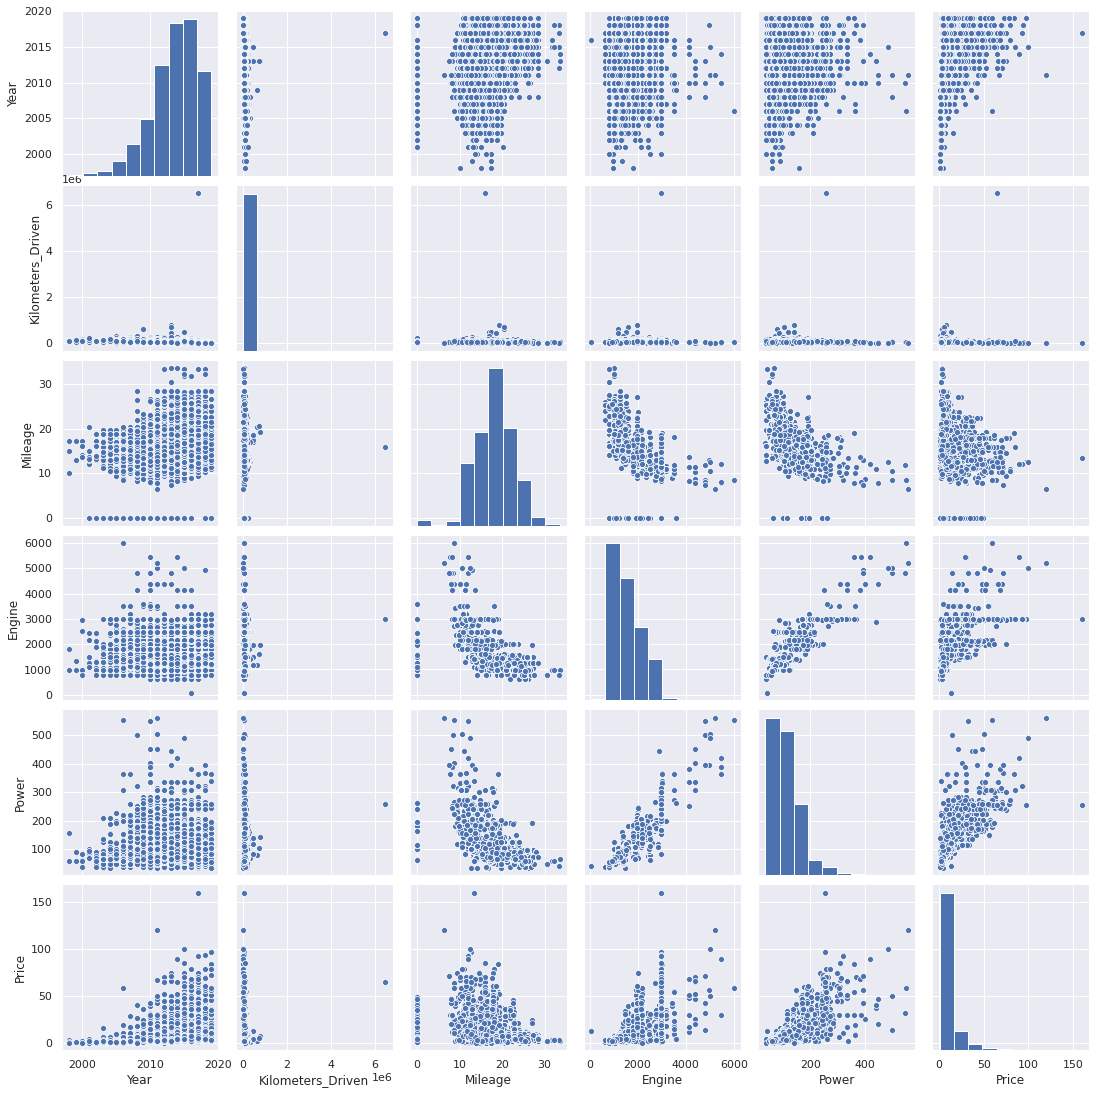

In [747]:
sns.pairplot(data_train)

In [748]:
data_train["Fuel_Type"].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [749]:
data_train["Kilometers_Driven"].value_counts()

60000.0    82
45000.0    70
65000.0    68
50000.0    61
70000.0    60
           ..
25948.0     1
42831.0     1
54996.0     1
77469.0     1
88578.0     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

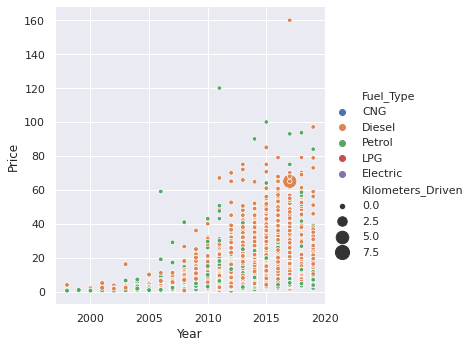

In [750]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Fuel_Type" , 
            size = "Kilometers_Driven", sizes=(20,200))

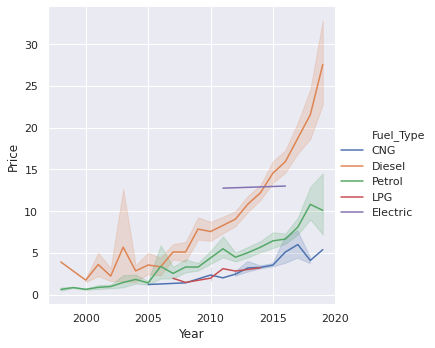

In [751]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Fuel_Type",  kind = "line" )

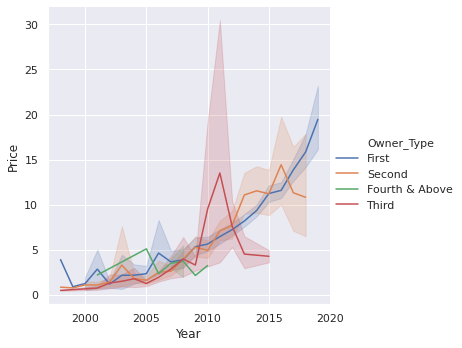

In [752]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Owner_Type", kind = "line" )

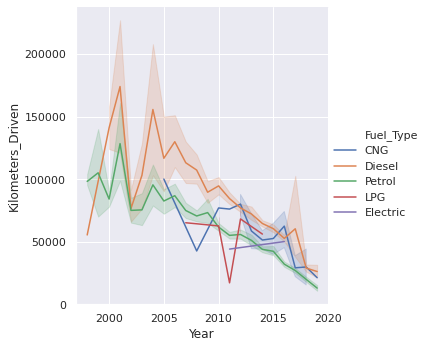

In [753]:
sns.relplot(x = "Year" , y = "Kilometers_Driven" , data = data_train , 
            hue = "Fuel_Type"  ,  kind = "line" )

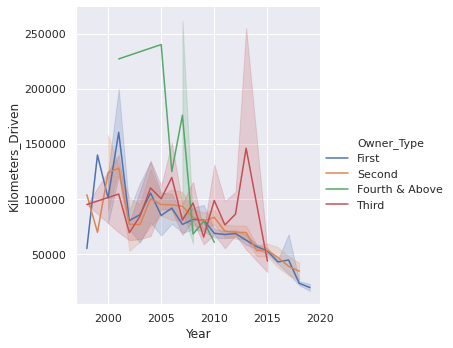

In [754]:
sns.relplot(x = "Year" , y = "Kilometers_Driven" , data = data_train ,
            hue = "Owner_Type"  ,  kind = "line" )

In [0]:
# sns.relplot(x = "Year" , y = "Mileage" , data = data_train)